In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/commonwealth-games-2022-indian-winners-full-list/Indian_medal_winners_CWgames2022.csv
/kaggle/input/commonwealth-games-2022-indian-winners-full-list/Countrywise_medals_CWgames2022.csv



 <font size="5"> Load libraries</font>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import warnings
from wordcloud import WordCloud

warnings.filterwarnings('ignore')

%matplotlib inline

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string



 <font size="5"> Indian medal winners dataset</font>

In [3]:
df_ind=pd.read_csv('/kaggle/input/commonwealth-games-2022-indian-winners-full-list/Indian_medal_winners_CWgames2022.csv')
df_ind.head()

,Unnamed: 0,No,Athlete/Team,Medal,Event,Sport
0,0,1,Sanket Sargar,Silver,Men's 55kg,Weightlifting
1,1,2,Gururaja Poojary,Bronze,Men's 61kg,Weightlifting
2,2,3,Mirabai Chanbu,Gold,Women's 49kg,Weightlifting
3,3,4,Bindyarani Devi,Silver,Women's 55kg,Weightlifting
4,4,5,Jeremy Lalrinnunga,Gold,Men's 67kg,Weightlifting


In [4]:
df_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    61 non-null     int64 
 1   No            61 non-null     int64 
 2   Athlete/Team  61 non-null     object
 3   Medal         61 non-null     object
 4   Event         61 non-null     object
 5   Sport         61 non-null     object
dtypes: int64(2), object(4)
memory usage: 3.0+ KB



 <font size="5"> Countrywise medals dataset</font>

In [5]:
df=pd.read_csv('/kaggle/input/commonwealth-games-2022-indian-winners-full-list/Countrywise_medals_CWgames2022.csv')
df.head()

,Unnamed: 0,Rank,Country,Gold,Silver,Bronze,Total
0,0,1,Australia,67,57,54,178
1,1,2,England,56,65,53,175
2,2,3,Canada,26,32,34,92
3,3,4,India,22,16,23,61
4,4,5,New Zealand,20,12,17,49


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  43 non-null     int64 
 1   Rank        43 non-null     int64 
 2   Country     43 non-null     object
 3   Gold        43 non-null     int64 
 4   Silver      43 non-null     int64 
 5   Bronze      43 non-null     int64 
 6   Total       43 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.5+ KB


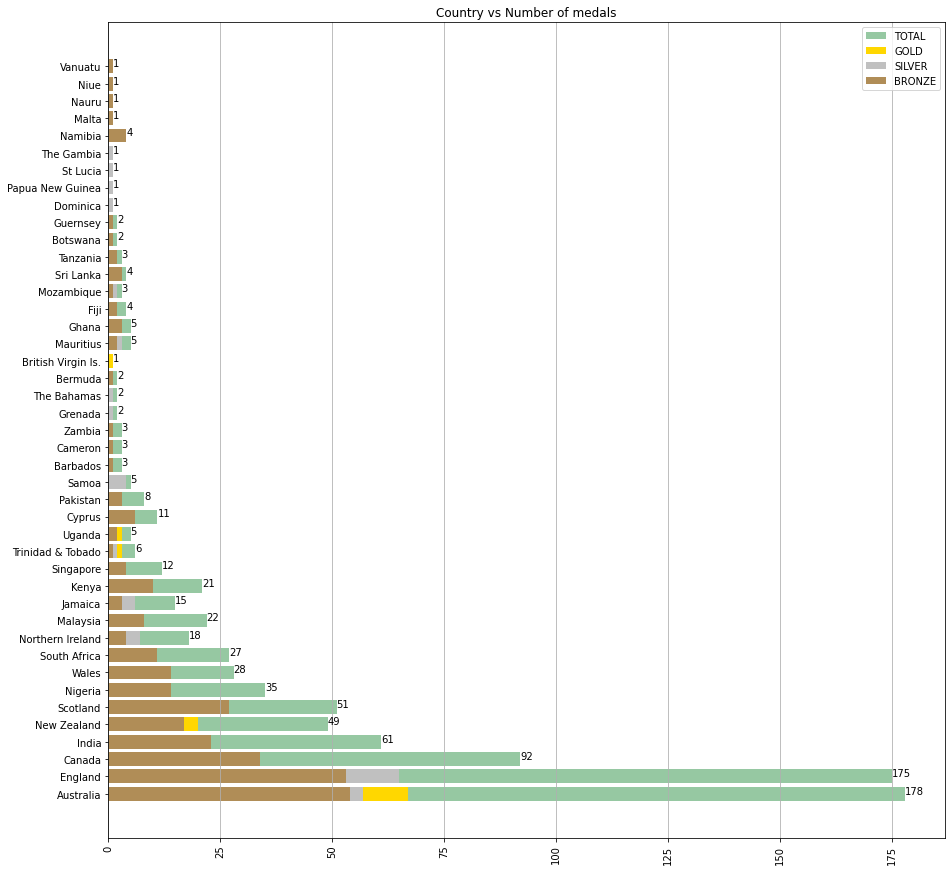

In [7]:
plt.figure(figsize=(15,15))
plt.barh('Country','Total',data=df,label='TOTAL',color='#96c8a2')
plt.barh('Country','Gold',data=df,label='GOLD',color='#ffd700')
plt.barh('Country','Silver',data=df,label='SILVER',color='#C0C0C0')
plt.barh('Country','Bronze',data=df,label='BRONZE',color='#b08d57')
plt.grid(axis='x') 
for index, value in enumerate(df['Total']):
    plt.text(value, index,
             str(value))
    
plt.title("Country vs Number of medals")    
plt.xticks(rotation = 90,fontsize=10)
plt.legend()
plt.show()

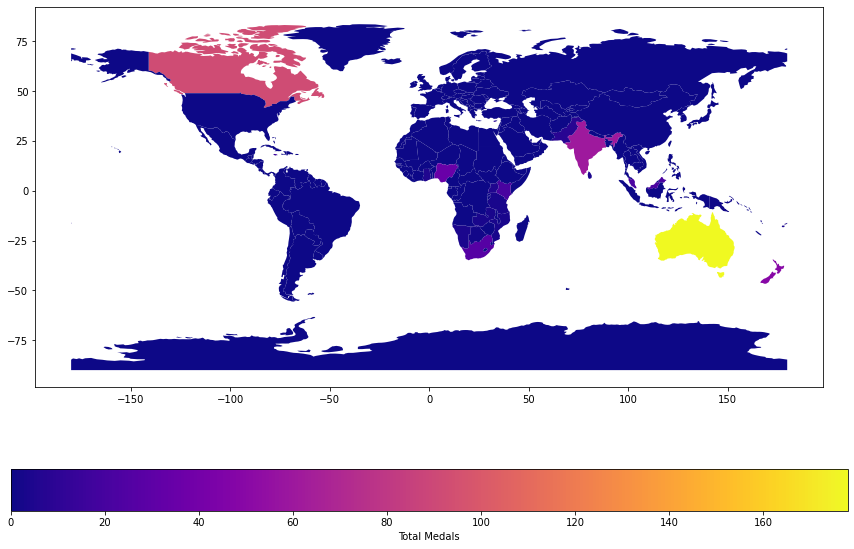

In [8]:
df_1=df.copy()

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
df_1 = world.merge(df_1, how="left", left_on=['name'], right_on=['Country'])
df_1.fillna(0, inplace = True)
df_1.plot('Total',legend=True,cmap='plasma', legend_kwds={"label": "Total Medals","orientation":"horizontal"},figsize=(15,10));


world[['Total','Country']]=df[['Total','Country']]
world.head()


 <font size="5">**INDIAN PLAYERS IN COMMONWEALTH-2022**</font>

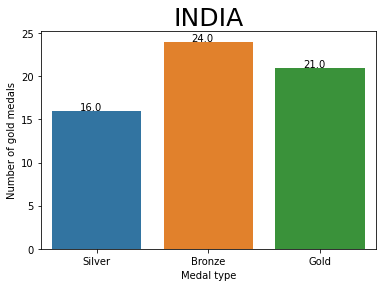

In [9]:
ax=sns.countplot(df_ind['Medal'])
plt.xlabel('Medal type')
plt.ylabel('Number of gold medals')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01),fontsize=10)

plt.title('INDIA',fontsize=25)
plt.show()

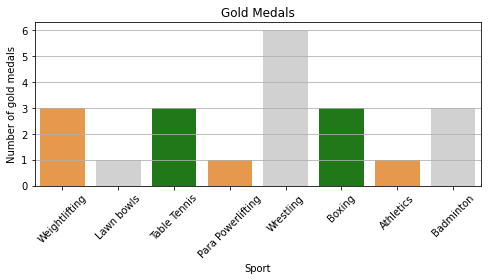

In [10]:
options = ['Gold']
plt.figure(figsize=(8,3))
colors=['#FF9933','#D1D1D1','#138808']

sns.countplot(df_ind[df_ind['Medal'].isin(options)]['Sport']
              ,palette=sns.set_palette(sns.color_palette(colors,8)))
plt.xticks(rotation = 45,fontsize=10)
plt.xlabel('Sport')
plt.ylabel('Number of gold medals')
plt.title('Gold Medals')

plt.grid(axis='y')  
plt.show()

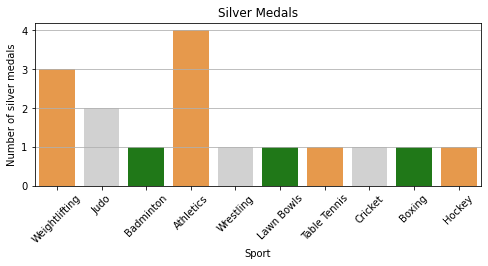

In [11]:
options = ['Silver']
plt.figure(figsize=(8,3))


sns.countplot(df_ind[df_ind['Medal'].isin(options)]['Sport']
              ,palette=sns.set_palette(sns.color_palette(colors,10)))
plt.xticks(rotation = 45,fontsize=10)
plt.xlabel('Sport')
plt.ylabel('Number of silver medals')
plt.title('Silver Medals')
plt.grid(axis='y') 
  
plt.show()

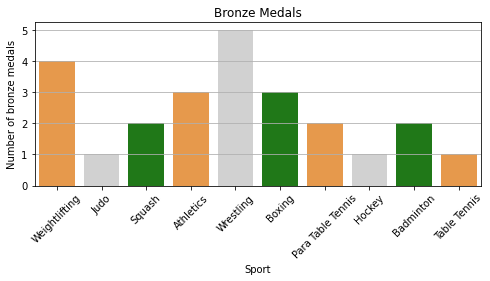

In [12]:
options = ['Bronze']
plt.figure(figsize=(8,3))


sns.countplot(df_ind[df_ind['Medal'].isin(options)]['Sport']
              ,palette=sns.set_palette(sns.color_palette(colors,10)))
plt.xticks(rotation = 45,fontsize=10)
plt.xlabel('Sport')
plt.ylabel('Number of bronze medals')
plt.title('Bronze Medals')

plt.grid(axis='y')   
plt.show()

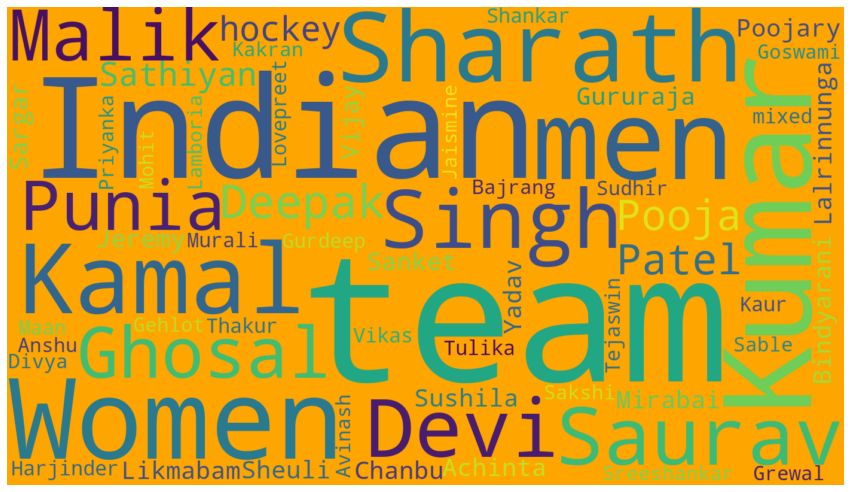

In [13]:
text =' '.join(df_ind.iloc[:,2])
plt.figure(figsize=(15,15))
wordcloud= WordCloud(background_color="orange",max_words=61, max_font_size= 300,  width=1400, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear',cmap ='copper')
plt.axis("off")
plt.show()

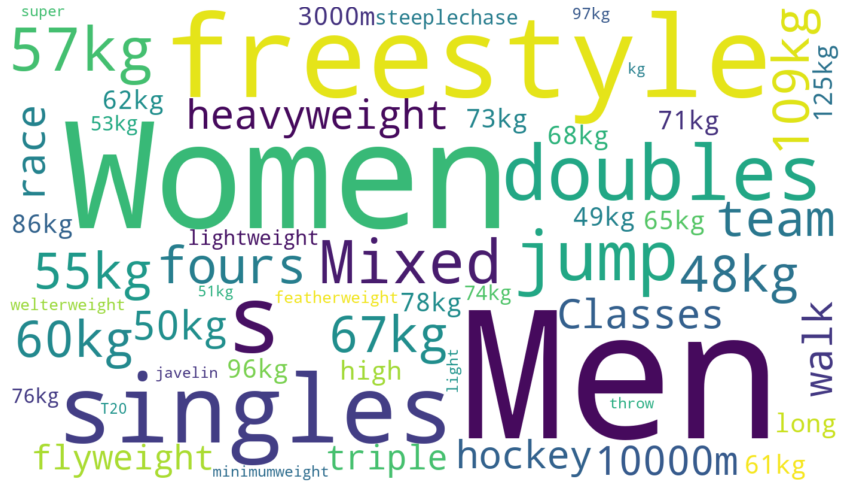

In [14]:
text =' '.join(df_ind.iloc[:,4])
plt.figure(figsize=(15,15))
wordcloud= WordCloud(background_color="white",max_words=61, max_font_size= 300,  width=1400, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear',cmap ='copper')
plt.axis("off")
plt.show()

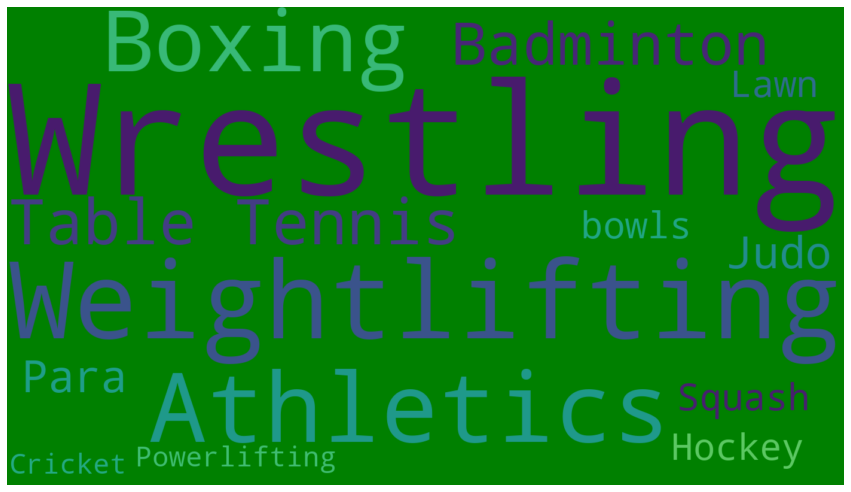

In [15]:
text =' '.join(df_ind.iloc[:,5])
plt.figure(figsize=(15,15))
wordcloud= WordCloud(background_color="green",max_words=61, max_font_size= 300,  width=1400, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear',cmap ='copper')
plt.axis("off")
plt.show()

If you find this notebook helpful, pleace make an upvote.

Thank you

**JAI HIND!!!**